In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
np.random.seed(666)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer

from scipy.stats import ks_2samp, chisquare, uniform

import dtale

In [2]:
pd.set_option('display.max_columns', 200)

*Та же часть предобработки, которая есть в предыдущей работе. Можно пропустить*

In [3]:
train = pd.read_csv('application_train.csv')
print(train.shape)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
test = pd.read_csv('application_test.csv')
test.drop(columns='SK_ID_CURR', inplace=True)
print(test.shape)
test.head()

(48744, 120)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-186

In [5]:
y = train['TARGET']
train.drop(columns=['SK_ID_CURR', 'TARGET'], inplace=True)

У нас несбалансированная выборка и это могло бы иметь проблемы, если итогвая метрика была не ROC AUC, или если бы мы применяли невероятностные алгоритмы, вроде SVM. А так ничего страшного и можно продолжать без увеличения редкого класса или уменьшения большого

In [6]:
y.value_counts(True) * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Есть немало признаков, где половина - это пропуски.

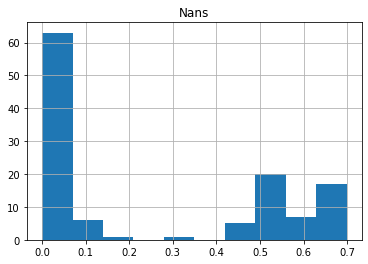

In [7]:
nans = pd.DataFrame(
    {
        'Nans': train.isna().sum() / train.shape[0],
        'Dtype': train.dtypes,
    }
).sort_values('Nans', ascending=False)
nans.hist();

Количество колонок с большим количеством пропусков

In [8]:
(nans['Nans'] > 0.4).sum() / nans.shape[0]

0.4083333333333333

Изначально была мысль удалить половину датасета, но так мы теряем много информации

In [9]:
# train.drop(columns=nans.loc[nans['Nans'] > 0.4].index, inplace=True)
# test.drop(columns=nans.loc[nans['Nans'] > 0.4].index, inplace=True)

Заполним пропуски средним и модой, если строка

In [10]:
for column in train.columns:
    if train[column].dtype == np.dtype('object'):
        train[column] = train[column].fillna(train[column].mode().iloc[0])
    else:
        train[column] = train[column].fillna(train[column].mean())
    
    if test[column].dtype == np.dtype('object'):
        test[column] = test[column].fillna(test[column].mode().iloc[0])
    else:
        test[column] = test[column].fillna(test[column].mean())

## Обработка категориальных признаков

In [11]:
data = pd.concat((train, test), keys=('train', 'test'))

In [12]:
data.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Удалим из рассмотрения OCCUPATION_TYPE и ORGANIZATION_TYPE, так как создание ohe для них будет очень затратным

In [13]:
# data.drop(columns=['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], inplace=True)

Для всего остального создадим ohe, но на одну меньше, чтобы сэкономить время обучения

In [14]:
data = pd.get_dummies(data, drop_first=True)

In [15]:
train = data.loc['train']
test = data.loc['test']

Очень неприятная особенность подобных конкурсов - это странное разбиение на train и test, что признаки имеют разные распределения. И модель, обученная на трейн начинает вести себя не так, как на тесте

Наверно никаких удалений таких признаков мы делать не будем, но можем показать с помощью критерий Колмогорова-Смирнова, что признаки выглядит по разному и в трейне и в тесте

In [16]:
comp_dist = []
for column in train.columns:
    p_value = ks_2samp(train[column], test[column]).pvalue
    comp_dist.append((column, round(p_value, 4)))
comp_dist = pd.DataFrame(comp_dist, columns=['Column', 'p_value'])

In [17]:
comp_dist.head(10)

,Column,p_value
0,CNT_CHILDREN,0.0001
1,AMT_INCOME_TOTAL,0.0000
2,AMT_CREDIT,0.0000
3,AMT_ANNUITY,0.0000
4,AMT_GOODS_PRICE,0.0000
5,REGION_POPULATION_RELATIVE,0.0000
6,DAYS_BIRTH,0.0124
7,DAYS_EMPLOYED,0.0000
8,DAYS_REGISTRATION,0.0000
9,DAYS_ID_PUBLISH,0.0000


Можно создать пару признаков на основе предметного знания

* CREDIT_INCOME_PERCENT - какую часть составляет кредит от зарплаты
* ANNUITY_INCOME_PERCENT - какую часть составляют выплаты от зарплаты
* CREDIT_TERM - какую часть составляют выплаты от зарплаты
* DAYS_EMPLOYED_PERCENT - какую часть составляет стаж от возраста

In [18]:
train.loc[:, 'CREDIT_INCOME_PERCENT'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train.loc[:, 'ANNUITY_INCOME_PERCENT'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train.loc[:, 'CREDIT_TERM'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train.loc[:, 'DAYS_EMPLOYED_PERCENT'] = train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']

test.loc[:, 'CREDIT_INCOME_PERCENT'] = test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']
test.loc[:, 'ANNUITY_INCOME_PERCENT'] = test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']
test.loc[:, 'CREDIT_TERM'] = test['AMT_ANNUITY'] / test['AMT_CREDIT']
test.loc[:, 'DAYS_EMPLOYED_PERCENT'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']

Теперь в наших данных остались две основные проблемы - это наличие выбросов и разный масштаб для каждого признака

Используем PowerTransformer, которые вначала применит преобразование yoe-johnson которые подберет нужный способ оценки выбросов, а потом нормализуем.

In [19]:
columns = train.columns

In [20]:
train.loc[:, 'AMT_INCOME_TOTAL'] = PowerTransformer(method='box-cox').fit_transform(train['AMT_INCOME_TOTAL'].to_numpy().reshape(-1, 1))
test.loc[:, 'AMT_INCOME_TOTAL'] = PowerTransformer(method='box-cox').fit_transform(test['AMT_INCOME_TOTAL'].to_numpy().reshape(-1, 1))

transformer = PowerTransformer()
train_t = StandardScaler(with_std=False).fit_transform(train)
test_t = StandardScaler(with_std=False).fit_transform(test)

train_t = transformer.fit_transform(train_t)
test_t = transformer.fit_transform(test_t)

In [21]:
train = pd.DataFrame(train_t, columns=columns)
test = pd.DataFrame(test_t, columns=columns)

Самописная cross_val_score функция

In [55]:
def cross_val(model, X, y):
    kf = KFold(3);
    scores = []
    
    for train_index, test_index in kf.split(X, y):
        train_X, train_y = X.loc[train_index], y.loc[train_index]
        test_X, test_y = X.loc[test_index], y.loc[test_index]
        
        model.fit(train_X, train_y)
        
        pred_y = model.predict_proba(test_X)[:, 1]
        score = roc_auc_score(test_y, pred_y)
        scores.append(score)
        
    scores = np.array(scores)
    print(f"mean: {scores.mean():.5f}, std: {scores.std():.5f}")
    return scores

# Все задания выполняются на датасете Home credit на kaggle

0. Взять три гиперпараметра для решающего дерева, и для каждого проварьировать один изних, фиксирую остальные. Построить графики зависимости метрики на кросс-валидации от параметра.

In [23]:
params = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

In [24]:
scores = []
for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:
        for min_samples_leaf in params['min_samples_leaf']:
            model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                min_samples_split=min_samples_split
            )
            scores.append(
                (cross_val_score(model, train, y).mean(), max_depth, min_samples_split, min_samples_leaf)
            )

In [25]:
# plt.figure(figsize=(12, 6))
# plt.xlabel('Combination of params')
# plt.ylabel('roc-auc')
# plt.plot(scores);

Интересно, что при изменении $min\_samples\_leaf$ и $min\_samples\_split$ в указанном у меня диапозоне - никаких колебаний не было. А то, что $max\_depth$ так влияет (хотя не особо заметно) не удивляет

1. Сделать с помощью GridSearchCV и RandomizedSearchCV отбор наилучших параметров для решающего дерева (без фанатизма, не стоит делать слишком долгие переборы). Какие параметры дают наилучший результат?

In [26]:
model = DecisionTreeClassifier()

In [27]:
gs = GridSearchCV(model, params, 'roc_auc', cv=3, n_jobs=-1)
%time gs.fit(train, y)

Wall time: 4min 56s


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'mi

In [29]:
rs = RandomizedSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1)
%time rs.fit(train, y)

Wall time: 51 s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [31]:
gs.best_params_, gs.best_score_

({'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2},
 0.7055316218305524)

In [32]:
rs.best_params_, rs.best_score_

({'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 5},
 0.7055285877188759)

$RandomizedSearchCV$ потратил в пять раз меньше времени и получил фактически такой же скор, как и $GridSearchCV$

Как мы до этого поняли - разница по остальным признакам кроме $max\_depth$ не важна и это заметно по скору и признакам между $rs$ и $gs$

2. Аналогично сделать пункты 0-1 для cлучайного леса

In [34]:
model = RandomForestClassifier()

In [35]:
params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 20, 100, 200]
}

In [36]:
gs = GridSearchCV(model, params, 'roc_auc', cv=3, n_jobs=-1)
%time gs.fit(train, y)

Wall time: 1h 5min 25s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [37]:
rs = RandomizedSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1)
%time rs.fit(train, y)

Wall time: 12min 44s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
gs.best_params_, gs.best_score_

({'max_depth': 10, 'min_samples_split': 200, 'n_estimators': 200},
 0.7390171801680964)

In [39]:
rs.best_params_, rs.best_score_

({'n_estimators': 200, 'min_samples_split': 100, 'max_depth': None},
 0.7345136066647067)

Разница во времени также отличается в пять раз. Теперь скор уже сильнее отличается и интересно, что RS предпочел выбрать максимальную глубину деревьев None, чем обрезанную 10

3. С помощью случайного леса получить оценку важности признаков. Какие признаки влияют больше всего на результат?

In [46]:
feat_imp = pd.DataFrame(rs.best_estimator_.feature_importances_, index=train.columns)
feat_imp.sort_values(0, ascending=False).head(15)

,0
EXT_SOURCE_2,0.088982
EXT_SOURCE_3,0.088580
EXT_SOURCE_1,0.038489
CREDIT_TERM,0.029108
DAYS_BIRTH,0.029015
DAYS_EMPLOYED_PERCENT,0.026304
DAYS_ID_PUBLISH,0.025383
DAYS_EMPLOYED,0.024390
DAYS_REGISTRATION,0.023956
DAYS_LAST_PHONE_CHANGE,0.022146


Список важных фич примерно такой же, как и при подподборе WOE IV, но вижу, что появился среди них CREDIT_TERM. А также первые две фичи порядком сильнее остальных, хотя все равно не стоит игнорировать остальные, учитывая, что у нас 232 фичи - все 15 очень сильные

4. Допусти вы построили модель на M признаках. Теперь отберите только 5 самых важных и постройте модель только на них. Как изменилась метрика на кросс-валидации? Прокомментируйте.

In [52]:
feats = feat_imp.sort_values(0, ascending=False).index[:5]

In [53]:
train_5 = train[feats]

In [57]:
cross_val(RandomForestClassifier(), train_5, y)

mean: 0.70319, std: 0.00337


array([0.70321413, 0.69904847, 0.70729317])

Метрика ухудшилась. Хотя видно, что первые две фичи: $EXT\_SOURCE\_2$, $EXT\_SOURCE\_3$ сильно важнее остальных, но все равно - многие фичи вносят серьезный вклад и если их убрать, то результат падает

5. Постройте модель на M-1 признаке, исключая самый важный. Как изменилась метрика на кросс-валидации? Прокомментируйте.

In [58]:
feats = feat_imp.sort_values(0, ascending=False).index[1:5]

In [59]:
train_4 = train[feats]

In [60]:
cross_val(RandomForestClassifier(), train_4, y)

mean: 0.66048, std: 0.00212


array([0.65955207, 0.6584655 , 0.66341184])

Результат снова упал и теперь заметно, но это логично. Мы же убрали один из двух самых сильных признаков